In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dsapol import dsapol
from scipy.signal import correlate
from scipy.signal import savgol_filter as sf
from scipy.signal import convolve
from scipy.signal import fftconvolve
from scipy.ndimage import convolve1d
from scipy.signal import peak_widths
from scipy.stats import chi
from scipy.stats import norm
import panel as pn
pn.extension()
#from numpy.ma import masked_array as ma
import numpy.ma as ma
from scipy.stats import kstest
from scipy.optimize import curve_fit
import time
#import numpy.ma as ma 
%load_ext autoreload
%autoreload 2 

from scipy.signal import find_peaks
from scipy.signal import peak_widths
import copy
import numpy as np
import os
import param

from sigpyproc import FilReader
from sigpyproc.Filterbank import FilterbankBlock
from sigpyproc.Header import Header
from matplotlib import pyplot as plt
import pylab
import pickle
import json
from scipy.interpolate import interp1d
from scipy.stats import chi2
from scipy.stats import chi
from scipy.signal import savgol_filter as sf
from scipy.signal import convolve
from scipy.ndimage import convolve1d
from RMtools_1D.do_RMsynth_1D import run_rmsynth
from RMtools_1D.do_RMclean_1D import run_rmclean
from RMtools_1D.do_QUfit_1D_mnest import run_qufit

plt.rcParams.update({
                    'font.size': 16,
                    'font.family': 'serif',
                    'axes.labelsize': 16,
                    'axes.titlesize': 16,
                    'xtick.labelsize': 12,
                    'ytick.labelsize': 12,
                    'xtick.direction': 'in',
                    'ytick.direction': 'in',
                    'xtick.top': True,
                    'ytick.right': True,
                    'lines.linewidth': 1,
                    'lines.markersize': 5,
                    'legend.fontsize': 14,
                    'legend.borderaxespad': 0,
                    'legend.frameon': False,
                    'legend.loc': 'lower right'})


from astropy.time import Time
from astropy.coordinates import EarthLocation
import astropy.units as u


def gauss_scint(x,bw,amp,off):
    return off + amp*np.exp(-np.log(2)*((x/bw)**2))


def lorentz_scint(x,bw,amp,off):
    return off + amp*(bw/(x**2 + (0.5*bw**2)))

fsize=30
fsize2=20
plt.rcParams.update({
                    'font.size': fsize,
                    'font.family': 'sans-serif',
                    'axes.labelsize': fsize,
                    'axes.titlesize': fsize,
                    'xtick.labelsize': fsize,
                    'ytick.labelsize': fsize,
                    'xtick.direction': 'in',
                    'ytick.direction': 'in',
                    'xtick.top': True,
                    'ytick.right': True,
                    'lines.linewidth': 1,
                    'lines.markersize': 5,
                    'legend.fontsize': fsize2,
                    'legend.borderaxespad': 0,
                    'legend.frameon': False,
                    'legend.loc': 'lower right'})

In [2]:
from pol_panel_funcs import pol_plot
from pol_panel_funcs import pol_panel


# Try again, implementing based on Casey's Template

In [3]:
#MOVED ALL THIS TO POL_PANEL_FUNCS.PY
"""
import matplotlib.ticker as ticker


from matplotlib.widgets import Slider, Button
from matplotlib.widgets import CheckButtons
from matplotlib.widgets import SpanSelector
from matplotlib.widgets import Button
from matplotlib.widgets import TextBox




def pol_plot(I_t,Q_t,U_t,V_t,I_f,Q_f,U_f,V_f,comp_dict,freq_test,I_t_weights,timestart,timestop,n_t=1,n_f=1,buff_L=1,buff_R=1,n_t_weight=1,sf_window_weights=1,width_native=1,lo=1,comp_width=100,comp_choose_on=False,fixed_comps=[],filt_weights_on=False,comp_num=0,freq_samp_on=False,maxcomps=4):
    fig = plt.figure(figsize=(20,24))
    ax = plt.subplot2grid(shape=(4, 2), loc=(0, 0),colspan=2)
    
    faxs = []
    #print("check1")
    for i in range(1,maxcomps+1):
        #if filt_weights_on or freq_samp_on:
        #    plt.text(0.1,0.1,comp_dict[i]["T/I_pre_"])
        faxs.append(plt.subplot2grid(shape=(4, 2), loc=( (i-1)//2+ 1, (i-1)%2)))
        faxs[i-1].set_xlim(np.min(freq_test[0]),np.max(freq_test[0]))
        faxs[i-1].set_ylabel("S/N")
        faxs[i-1].set_title("Component #" + str(i))
        faxs[-1].set_xlabel("Freq. (MHz)")
        #print("check1.5")
    #print("check2")
            
    faxs.append(plt.subplot2grid(shape=(4, 1), loc=(3, 0),colspan=2))
    faxs[-1].set_xlim(np.min(freq_test[0]),np.max(freq_test[0]))
    faxs[-1].set_ylabel("S/N")
    faxs[-1].set_title("All Components")
    faxs[-1].set_xlabel("Frequency (MHz)")
    

    #plot filterweights always
    if filt_weights_on or freq_samp_on:
        ax.plot((I_t_weights*np.max(I_t)/np.max(I_t_weights))[timestart:timestop],label="weights",linewidth=4,color="purple",alpha=0.75)
        peak = np.argmax(I_t_weights[timestart:timestop])
        ax.set_xlim(int(peak - (1e-3)/(32.7e-6)),int(peak + (1e-3)/(32.7e-6)))
        #ax1.set_xlim(int(peak - (1e-3)/(32.7e-6)),int(peak + (1e-3)/(32.7e-6)))
    else:
        peak = np.argmax(I_t[timestart:timestop])
        ax.set_xlim(int(peak - (1e-3)/(32.7e-6)),int(peak + (1e-3)/(32.7e-6)))
        

    #print("check3")
    if filt_weights_on:   
        for i in range(len(comp_dict.keys())):
            print(i)
            print(comp_dict[i])
            print(comp_dict[i]["I_f"])
            faxs[i].plot(freq_test[0],comp_dict[i]["I_f"],label="I")
            faxs[i].plot(freq_test[0],comp_dict[i]["Q_f"],label="Q")
            faxs[i].plot(freq_test[0],comp_dict[i]["U_f"],label="U")
            faxs[i].plot(freq_test[0],comp_dict[i]["V_f"],label="V")
    else:
        ax.set_xlim(0,timestop-timestart)
        #ax1.set_xlim(0,timestop-timestart)
    
    ax.plot(I_t[timestart:timestop],label="I")
    ax.plot(Q_t[timestart:timestop],label="Q")
    ax.plot(U_t[timestart:timestop],label="U")
    ax.plot(V_t[timestart:timestop],label="V")
    ax.legend(loc="upper right")
    
    #print("check4")
    if comp_choose_on:
        ax.axvline(lo,color='red')
        ax.axvline(lo+comp_width,color='red')
        ax.axvspan(lo, lo+comp_width, alpha=0.5, color='red')
        
        for i in range(len(fixed_comps)):
            ax.axvline(fixed_comps[i][0],color="green")
            ax.axvline(fixed_comps[i][1],color="green")
            ax.axvspan(fixed_comps[i][0], fixed_comps[i][1], alpha=0.5, color='green')
        #print("check4.5")
            
            
        
    ax.set_xlabel("Time Sample ({a} $\mu s$)".format(a=np.around(n_t*32.7,1)))
    ax.set_ylabel("S/N")
    #plt.show()
                    
    if freq_samp_on:
        faxs[-1].plot(freq_test[0],I_f,label="I")
        faxs[-1].plot(freq_test[0],Q_f,label="Q")
        faxs[-1].plot(freq_test[0],U_f,label="U")
        faxs[-1].plot(freq_test[0],V_f,label="V")
        
        for i in range(len(comp_dict.keys())):
            faxs[i].plot(freq_test[0],comp_dict[i]["I_f"],label="I")
            faxs[i].plot(freq_test[0],comp_dict[i]["Q_f"],label="Q")
            faxs[i].plot(freq_test[0],comp_dict[i]["U_f"],label="U")
            faxs[i].plot(freq_test[0],comp_dict[i]["V_f"],label="V")
            
            
            
    #print("check5")
    #fig.tight_layout()  
    plt.subplots_adjust(hspace=0.5)
    return fig
    
    

    
class pol_panel(param.Parameterized):
    
    
    
    #param linked to dropdown menu 
    #frb_submitted = param.String(default="")#param.Integer(default=0,bounds=(0,8),label=r'clicks')
    #frb_loaded = False
    frb_name = param.String(default="")
    error = param.String(default="",label="output/errors")
    error2 = param.String(default="",label="tmp")
    
    

    
    I = np.zeros((20480,192))#6144))
    Q = np.zeros((20480,192))#6144))
    U = np.zeros((20480,192))#6144))
    V = np.zeros((20480,192))#6144))
    
    
    
    
    I_t_init = np.zeros(20480)
    Q_t_init = np.zeros(20480)
    U_t_init = np.zeros(20480)
    V_t_init = np.zeros(20480)
    
    fobj = None#fobj#None
    timeaxis = np.zeros(20480)#timeaxis#np.zeros(20480)
    freq_test_init = [np.zeros(192)]*4
    wav_test = [np.zeros(192)]*4
    
    
    n_t = param.Integer(default=1,bounds=(1,128),label=r'n_t')
    n_t_prev = 1
    buff_L = param.Integer(default=1,bounds=(0,20),label=r'left buffer')
    buff_R = param.Integer(default=1,bounds=(0,20),label=r'right buffer')
    #n_t_weight = param.Integer(default=1,bounds=(1,10),label=r'n_tw')
    log_n_t_weight = param.Integer(default=0,bounds=(0,10),label=r'log(n_tw)')
    n_t_weight = 1
    sf_window_weights = param.Integer(default=1,bounds=(1,19),step=2,label=r'sf window')
    ibox = param.Integer(default=1,bounds=(1,128),label=r'ibox')
    comp_width = param.Integer(default=10,bounds=(1,128),label=r'mask width')
    log_n_f = param.Integer(default=0,bounds=(0,10),label=r'log2(n_f)')
    n_f = 1
    n_f_prev = 1
    
    
    #polarization display
    param.String(default="",label="tmp")
    
    
    STEP = 0
    
    I_t = np.nan*np.ones(I.shape[1])
    Q_t = np.nan*np.ones(I.shape[1])
    U_t = np.nan*np.ones(I.shape[1])
    V_t = np.nan*np.ones(I.shape[1])
    
    I_f_init = I.mean(1)#np.zeros(I.shape[0])
    Q_f_init = Q.mean(1)#np.zeros(Q.shape[0])
    U_f_init = U.mean(1)#np.zeros(U.shape[0])
    V_f_init = V.mean(1)#np.zeros(V.shape[0])
    
    
    
    #@param.depends('frb_mid', watch=True
    
    def load_FRB(self):
        try:
            if self.error=="Loading FRB...":
                ids = self.frb_name[:10]#"230307aaao"#"220207aabh"#"221029aado"
                nickname = self.frb_name[11:]#"phineas"#"zach"#"mifanshan"
                datadir = "/media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/"+ids + "_" + nickname + "/"
                #ibeam = 218
                #caldate="22-12-18"
                #self.frb_name = "Loading " + ids + "_" + nickname + " ..."
                #self.view()
                (self.I,self.Q,self.U,self.V,self.fobj,self.timeaxis,self.freq_test_init,self.wav_test) = dsapol.get_stokes_2D(datadir,ids + "_dev",20480,n_t=self.n_t,n_f=32,n_off=int(12000//self.n_t),sub_offpulse_mean=True)
                self.freq_test = copy.deepcopy(self.freq_test_init)
                (self.I_t_init,self.Q_t_init,self.U_t_init,self.V_t_init) = dsapol.get_stokes_vs_time(self.I,self.Q,self.U,self.V,self.ibox,self.fobj.header.tsamp,self.n_t,n_off=int(12000//self.n_t),plot=False,show=True,normalize=True,buff=1,window=30)
                #self.frb_loaded = True
                
                #time.sleep(5)
                self.error = "Complete!"
                #self.frb_name = "Loaded " + ids + "_" + nickname + " ..."
                
        except Exception as e:
            self.error = "From load_FRB(): " + str(e)
        return
    
    
    #***COMPONENT SELECTION MODULE***#
    peak = int(15280)
    timestart = int(peak - (5e-3)/(32.7e-6))
    timestop = int(peak + (5e-3)/(32.7e-6))
    lo_frac = param.Number(default=0,bounds=(0,1),label=r'lower bound',step=1/(timestop-timestart))#param.Number(default=0,bounds=(0,timestop-timestart),label=r'lower bound')
    lo = 0#lo_frac*(timestop-timestart)
    
    #lo = ((timestop-timestart)/2)
    comp_choose_on = False
    filt_weights_on = False
    freq_samp_on = False
    
    fixed_comps = []
    complist_min = []
    complist_max = []
    def clicked_next(self):
        try:
            if self.comp_choose_on:
                self.complist_min.append(int(np.floor(self.lo)))
                self.complist_max.append(int(np.ceil(self.lo+self.comp_width)))
                self.fixed_comps.append([int(np.floor(self.lo)),int(np.ceil(self.lo+self.comp_width))])
                self.param.trigger('next_comp')
            elif self.filt_weights_on and ( self.curr_comp < len(self.fixed_comps)-1):
                #save filter weights for current component
                self.comp_dict[self.curr_comp] =dict()
                self.comp_dict[self.curr_comp]["comp_num"] = self.curr_comp
                self.comp_dict[self.curr_comp]["buff"] = [self.buff_L,self.buff_R]
                self.comp_dict[self.curr_comp]["n_t_weight"] = self.n_t_weight
                self.comp_dict[self.curr_comp]["sf_window_weights"] = self.sf_window_weights
                self.comp_dict[self.curr_comp]["ibox"] = self.ibox
                self.comp_dict[self.curr_comp]["mask_start"] = self.complist_min[self.curr_comp]
                self.comp_dict[self.curr_comp]["mask_stop"] = self.complist_max[self.curr_comp]
                self.comp_dict[self.curr_comp]["weights"] = self.curr_weights
                
                #get spectrum for current component
                (I_fmasked,Q_fmasked,U_fmasked,V_fmasked) = dsapol.get_stokes_vs_freq(self.I,self.Q,self.U,self.V,1,self.fobj.header.tsamp,1,self.n_t,self.freq_test_init,n_off=int(12000/self.n_t),plot=False,show=False,normalize=True,weighted=True,timeaxis=self.timeaxis,fobj=self.fobj,input_weights=self.curr_weights)

                
                self.comp_dict[self.curr_comp]["I_f"] = I_fmasked
                self.comp_dict[self.curr_comp]["Q_f"] = Q_fmasked
                self.comp_dict[self.curr_comp]["U_f"] = U_fmasked
                self.comp_dict[self.curr_comp]["V_f"] = V_fmasked
                
                self.comp_dict[self.curr_comp]["I_f_init"] = I_fmasked
                self.comp_dict[self.curr_comp]["Q_f_init"] = Q_fmasked
                self.comp_dict[self.curr_comp]["U_f_init"] = U_fmasked
                self.comp_dict[self.curr_comp]["V_f_init"] = V_fmasked
                
                #get polarization fractions
                [(pol_f,pol_t,avg_frac,sigma_frac,snr_frac),(L_f,L_t,avg_L,sigma_L,snr_L),(C_f,C_t,avg_C_abs,sigma_C_abs,snr_C),(C_f,C_t,avg_C,sigma_C,snr_C),snr] = dsapol.get_pol_fraction(self.I,self.Q,self.U,self.V,self.ibox,self.fobj.header.tsamp,self.n_t,1,self.freq_test_init,n_off=int(12000/self.n_t),normalize=True,weighted=True,timeaxis=self.timeaxis,fobj=self.fobj,multipeaks=False,height=0.03,input_weights=self.curr_weights)
                self.comp_dict[self.curr_comp]["T/I_pre"] = avg_frac
                self.comp_dict[self.curr_comp]["T/I_pre_err"] = sigma_frac
                self.comp_dict[self.curr_comp]["T/I_pre_snr"] = snr_frac
                self.comp_dict[self.curr_comp]["L/I_pre"] = avg_L
                self.comp_dict[self.curr_comp]["L/I_pre_err"] = sigma_L
                self.comp_dict[self.curr_comp]["L/I_pre_snr"] = snr_L
                self.comp_dict[self.curr_comp]["absV/I_pre"] = avg_C_abs
                self.comp_dict[self.curr_comp]["absV/I_pre_err"] = sigma_C_abs
                self.comp_dict[self.curr_comp]["V/I"] = avg_C
                self.comp_dict[self.curr_comp]["V/I_err"] = sigma_C
                self.comp_dict[self.curr_comp]["V/I_snr"] = snr_C
                self.comp_dict[self.curr_comp]["I_snr"] = snr
                
                
                #update displays
                self.Tpol = r'{a}$\pm${b}'.format(a=np.around(avg_frac,2),b=np.around(sigma_frac,2))
                self.Lpol = r'{a}$\pm${b}'.format(a=np.around(avg_L,2),b=np.around(sigma_L,2))
                self.absCpol = r'{a}$\pm${b}'.format(a=np.around(avg_C_abs,2),b=np.around(sigma_C_abs,2))
                self.Cpol = r'{a}$\pm${b}'.format(a=np.around(avg_C,2),b=np.around(sigma_C,2))
                
                
                
                self.curr_comp += 1
                self.param.trigger('next_comp')
                
        except Exception as e:
            self.error = "From clicked_next(): " + str(e)
            
        return
    def clicked_get(self):
        try:
            self.comp_choose_on = not self.comp_choose_on
            self.param.trigger('get_comp')
        except Exception as e:
            self.error = "From clicked_get(): " + str(e)
        return
    def clicked_done(self):
        try:
            if self.comp_choose_on:
                self.comp_choose_on = False
                self.filt_weights_on = True
                
                self.I = dsapol.avg_time(self.I,self.n_t)
                self.Q = dsapol.avg_time(self.Q,self.n_t)
                self.U = dsapol.avg_time(self.U,self.n_t)
                self.V = dsapol.avg_time(self.V,self.n_t)
                
                
                self.param.trigger('done')
            elif self.filt_weights_on:
                if ( self.curr_comp < len(self.fixed_comps)-1):
                    self.error = "Still have " + str(len(self.fixed_comps) - self.curr_comp) + " components left"
                else:
                    #save filter weights for current component
                    self.comp_dict[self.curr_comp] =dict()
                    self.comp_dict[self.curr_comp]["comp_num"] = self.curr_comp
                    self.comp_dict[self.curr_comp]["buff"] = [self.buff_L,self.buff_R]
                    self.comp_dict[self.curr_comp]["n_t_weight"] = self.n_t_weight
                    self.comp_dict[self.curr_comp]["sf_window_weights"] = self.sf_window_weights
                    self.comp_dict[self.curr_comp]["ibox"] = self.ibox
                    self.comp_dict[self.curr_comp]["mask_start"] = self.complist_min[self.curr_comp]
                    self.comp_dict[self.curr_comp]["mask_stop"] = self.complist_max[self.curr_comp]
                    self.comp_dict[self.curr_comp]["weights"] = self.curr_weights
                    
                    (I_fmasked,Q_fmasked,U_fmasked,V_fmasked) = dsapol.get_stokes_vs_freq(self.I,self.Q,self.U,self.V,1,self.fobj.header.tsamp,1,self.n_t,self.freq_test_init,n_off=int(12000/self.n_t),plot=False,show=False,normalize=True,weighted=True,timeaxis=self.timeaxis,fobj=self.fobj,input_weights=self.curr_weights)
                    print("GOT FREQ")
                    self.comp_dict[self.curr_comp]["I_f"] = I_fmasked
                    self.comp_dict[self.curr_comp]["Q_f"] = Q_fmasked
                    self.comp_dict[self.curr_comp]["U_f"] = U_fmasked
                    self.comp_dict[self.curr_comp]["V_f"] = V_fmasked
                
                    self.comp_dict[self.curr_comp]["I_f_init"] = I_fmasked
                    self.comp_dict[self.curr_comp]["Q_f_init"] = Q_fmasked
                    self.comp_dict[self.curr_comp]["U_f_init"] = U_fmasked
                    self.comp_dict[self.curr_comp]["V_f_init"] = V_fmasked
                
                    #get polarization fractions
                    [(pol_f,pol_t,avg_frac,sigma_frac,snr_frac),(L_f,L_t,avg_L,sigma_L,snr_L),(C_f,C_t,avg_C_abs,sigma_C_abs,snr_C),(C_f,C_t,avg_C,sigma_C,snr_C),snr] = dsapol.get_pol_fraction(self.I,self.Q,self.U,self.V,self.ibox,self.fobj.header.tsamp,self.n_t,1,self.freq_test_init,n_off=int(12000/self.n_t),normalize=True,weighted=True,timeaxis=self.timeaxis,fobj=self.fobj,multipeaks=False,height=0.03,input_weights=self.curr_weights)
                    self.comp_dict[self.curr_comp]["T/I_pre"] = avg_frac
                    self.comp_dict[self.curr_comp]["T/I_pre_err"] = sigma_frac
                    self.comp_dict[self.curr_comp]["T/I_pre_snr"] = snr_frac
                    self.comp_dict[self.curr_comp]["L/I_pre"] = avg_L
                    self.comp_dict[self.curr_comp]["L/I_pre_err"] = sigma_L
                    self.comp_dict[self.curr_comp]["L/I_pre_snr"] = snr_L
                    self.comp_dict[self.curr_comp]["absV/I_pre"] = avg_C_abs
                    self.comp_dict[self.curr_comp]["absV/I_pre_err"] = sigma_C_abs
                    self.comp_dict[self.curr_comp]["V/I"] = avg_C
                    self.comp_dict[self.curr_comp]["V/I_err"] = sigma_C
                    self.comp_dict[self.curr_comp]["V/I_snr"] = snr_C
                    self.comp_dict[self.curr_comp]["I_snr"] = snr
                    
                    #update displays
                    self.Tpol = r'{a}%'.format(a=np.around(100*avg_frac,2))
                    self.Lpol = r'{a}%'.format(a=np.around(100*avg_L,2))
                    self.absCpol = r'{a}%'.format(a=np.around(100*avg_C_abs,2))
                    self.Cpol = r'{a}%'.format(a=np.around(100*avg_C,2))
                    
                    self.Tpolerr = r'{a}%'.format(a=np.around(100*sigma_frac,2))
                    self.Lpolerr = r'{a}%'.format(a=np.around(100*sigma_L,2))
                    self.absCpolerr = r'{a}%'.format(a=np.around(100*sigma_C_abs,2))
                    self.Cpolerr = r'{a}%'.format(a=np.around(100*sigma_C,2))

                    self.curr_comp += 1

                    self.curr_weights = np.zeros(len(self.curr_weights))
                    for i in range(len(self.fixed_comps)):
                        self.curr_weights += self.comp_dict[i]["weights"]
                    self.curr_weights = self.curr_weights/np.sum(self.curr_weights)
                    self.filt_weights_on = False
                    self.freq_samp_on = True
    

                    (self.I_f_init,self.Q_f_init,self.U_f_init,self.V_f_init) = dsapol.get_stokes_vs_freq(self.I,self.Q,self.U,self.V,1,self.fobj.header.tsamp,1,self.n_t,self.freq_test_init,n_off=int(12000/self.n_t),plot=False,show=False,normalize=True,weighted=True,timeaxis=self.timeaxis,fobj=self.fobj,input_weights=self.curr_weights)

                    self.STEP = 1
                self.param.trigger('done')

        except Exception as e:
            self.error2 = "From clicked_done(): " + str(e)
            time.sleep(60)
        return
    #up = param.Action(clicked_up)#clicked)
    #down = param.Action(clicked_down)
    next_comp = param.Action(clicked_next,label="Next")
    get_comp = param.Action(clicked_get,label="Get Components")
    done = param.Action(clicked_done,label='Done')
    
    
    #polarization
    Tpol = param.String(default="",label="T/I")
    Tpolerr = param.String(default="",label="error")
    Lpol = param.String(default="",label="L/I")
    Lpolerr = param.String(default="",label="error")
    absCpol = param.String(default="",label="|V|/I")
    absCpolerr = param.String(default="",label="error")
    Cpol = param.String(default="",label="V/I")
    Cpolerr = param.String(default="",label="error")
    
    
    #***FILTER WEIGHTS MODULE***#
    comp_dict = dict()
    curr_comp = 0
    curr_weights = []
    
    #click_data = param.Dict(doc="test")
    #print(click_data)
    
    
    #***FREQUENCY DOWNSAMPLE MODULE***#
    I_f = np.nan*np.ones(len(I_f_init))
    Q_f = np.nan*np.ones(len(I_f_init))
    U_f = np.nan*np.ones(len(I_f_init))
    V_f = np.nan*np.ones(len(I_f_init))
    freq_test = copy.deepcopy(freq_test_init)
    
    
    
    
    
    
    #***VIEWING MODULE***#
    #@param.depends('frb_submitted', watch=True)
    #@param.depends('frb_loaded', watch=True)
    def view(self):
        try:
            if self.error == "Loading FRB...":
                #self.error = "Loading FRB..."
                self.load_FRB()
                
            #self.load_FRB()
            #self.frb_submitted = self.frb_submitted
            #self.error = str(self.frb_submitted)
            #if self.frb_loaded: self.error = "loaded"
            #self.error = self.frb_name + " " + str(self.frb_loaded) + str(self.frb_submitted)
            #self.hi = self.lo + self.comp_width
            #self.lo =(self.lo* (self.n_t_prev/self.n_t))
            #self.hi *= (self.n_t_prev/self.n_t)
            #self.comp_width = self.comp_width*(self.n_t_prev/self.n_t)
            #if self.n_t != self.n_t_prev or self.n_f != self.n_f_prev:
                #self.dyn_spec = dsapol.avg_freq(dsapol.avg_time(I2,self.n_t),self.n_f)


            self.n_t_prev = self.n_t
            self.n_f = 2**self.log_n_f
            self.n_t_weight = 2**self.log_n_t_weight
            
            #compute timestart, timestop around approx peak
            peak = int(15280/self.n_t)
            timestart = int(peak - (5e-3)/(self.n_t*32.7e-6))
            timestop = int(peak + (5e-3)/(self.n_t*32.7e-6))
            self.lo = self.lo_frac*(timestop-timestart)

            #downsample
            self.I_t = self.I_t_init[len(self.I_t_init)%self.n_t:]
            self.I_t = self.I_t.reshape(len(self.I_t)//self.n_t,self.n_t).mean(1)
            self.Q_t = self.Q_t_init[len(self.Q_t_init)%self.n_t:]
            self.Q_t = self.Q_t.reshape(len(self.Q_t)//self.n_t,self.n_t).mean(1)
            self.U_t = self.U_t_init[len(self.U_t_init)%self.n_t:]
            self.U_t = self.U_t.reshape(len(self.U_t)//self.n_t,self.n_t).mean(1)
            self.V_t = self.V_t_init[len(self.V_t_init)%self.n_t:]
            self.V_t = self.V_t.reshape(len(self.V_t)//self.n_t,self.n_t).mean(1)

            #compute weights
            if self.filt_weights_on:
                for i in range(len(self.fixed_comps)):
                    if i != self.curr_comp:
                        mask = np.zeros(len(self.I_t))
                        TSTART = int(int(15280/self.n_t) - (5e-3)/(self.n_t*32.7e-6)) + int(self.complist_min[i])
                        TSTOP = int(int(15280/self.n_t) - (5e-3)/(self.n_t*32.7e-6)) + int(self.complist_max[i])
                        mask[int(TSTART):int(TSTOP)] = 1
                        self.I_t = ma.masked_array(self.I_t,mask)
                        self.Q_t = ma.masked_array(self.Q_t,mask)
                        self.U_t = ma.masked_array(self.U_t,mask)
                        self.V_t = ma.masked_array(self.V_t,mask)
                self.curr_weights = dsapol.get_weights_1D(self.I_t,self.Q_t,self.U_t,self.V_t,-1,-1,self.ibox,self.fobj.header.tsamp,self.n_f,self.n_t,self.freq_test_init,n_off=int(12000/self.n_t),buff=[self.buff_L,self.buff_R],n_t_weight=self.n_t_weight,sf_window_weights=self.sf_window_weights,padded=True,norm=False,timeaxis=self.timeaxis,fobj=self.fobj)
        #except Exception as e:
        #    self.error = "From view1(): " + str(e)
        #try:
            #get frequency spectrum
            if self.freq_samp_on:
                self.freq_test = (self.freq_test_init[0])[len(self.freq_test_init[0])%self.n_f:]
                self.freq_test = self.freq_test.reshape(len(self.freq_test)//self.n_f,self.n_f).mean(1)
                self.freq_test = [self.freq_test]*4


                self.I_f = self.I_f_init[len(self.I_f_init)%self.n_f:]
                self.I_f = self.I_f.reshape(len(self.I_f)//self.n_f,self.n_f).mean(1)
                self.Q_f = self.Q_f_init[len(self.Q_f_init)%self.n_f:]
                self.Q_f = self.Q_f.reshape(len(self.Q_f)//self.n_f,self.n_f).mean(1)
                self.U_f = self.U_f_init[len(self.U_f_init)%self.n_f:]
                self.U_f = self.U_f.reshape(len(self.U_f)//self.n_f,self.n_f).mean(1)
                self.V_f = self.V_f_init[len(self.V_f_init)%self.n_f:]
                self.V_f = self.V_f.reshape(len(self.V_f)//self.n_f,self.n_f).mean(1)
                
                
                for i in range(len(self.comp_dict.keys())):
                    self.comp_dict[i]["I_f"] = self.comp_dict[i]["I_f_init"][len(self.comp_dict[i]["I_f_init"])%self.n_f:]
                    self.comp_dict[i]["I_f"] = self.comp_dict[i]["I_f"].reshape(len(self.comp_dict[i]["I_f"])//self.n_f,self.n_f).mean(1)
                    self.comp_dict[i]["Q_f"] = self.comp_dict[i]["Q_f_init"][len(self.comp_dict[i]["Q_f_init"])%self.n_f:]
                    self.comp_dict[i]["Q_f"] = self.comp_dict[i]["Q_f"].reshape(len(self.comp_dict[i]["Q_f"])//self.n_f,self.n_f).mean(1)
                    self.comp_dict[i]["U_f"] = self.comp_dict[i]["U_f_init"][len(self.comp_dict[i]["U_f_init"])%self.n_f:]
                    self.comp_dict[i]["U_f"] = self.comp_dict[i]["U_f"].reshape(len(self.comp_dict[i]["U_f"])//self.n_f,self.n_f).mean(1)
                    self.comp_dict[i]["V_f"] = self.comp_dict[i]["V_f_init"][len(self.comp_dict[i]["V_f_init"])%self.n_f:]
                    self.comp_dict[i]["V_f"] = self.comp_dict[i]["V_f"].reshape(len(self.comp_dict[i]["V_f"])//self.n_f,self.n_f).mean(1)
        #except Exception as e:
        #    self.error = "From view2(): " + str(e)
        #try:
            return pol_plot(self.I_t,self.Q_t,self.U_t,self.V_t,self.I_f,self.Q_f,self.U_f,self.V_f,self.comp_dict,self.freq_test,self.curr_weights,timestart,timestop,self.n_t,self.n_f,self.buff_L,self.buff_R,self.n_t_weight,self.sf_window_weights,self.ibox,self.lo,self.comp_width,self.comp_choose_on,self.fixed_comps,self.filt_weights_on,self.curr_comp,self.freq_samp_on)
        except Exception as e:
            self.error = "From view3(): " + str(e)
        return
            
"""


'\nimport matplotlib.ticker as ticker\n\n\nfrom matplotlib.widgets import Slider, Button\nfrom matplotlib.widgets import CheckButtons\nfrom matplotlib.widgets import SpanSelector\nfrom matplotlib.widgets import Button\nfrom matplotlib.widgets import TextBox\n\n\n\n\ndef pol_plot(I_t,Q_t,U_t,V_t,I_f,Q_f,U_f,V_f,comp_dict,freq_test,I_t_weights,timestart,timestop,n_t=1,n_f=1,buff_L=1,buff_R=1,n_t_weight=1,sf_window_weights=1,width_native=1,lo=1,comp_width=100,comp_choose_on=False,fixed_comps=[],filt_weights_on=False,comp_num=0,freq_samp_on=False,maxcomps=4):\n    fig = plt.figure(figsize=(20,24))\n    ax = plt.subplot2grid(shape=(4, 2), loc=(0, 0),colspan=2)\n    \n    faxs = []\n    #print("check1")\n    for i in range(1,maxcomps+1):\n        #if filt_weights_on or freq_samp_on:\n        #    plt.text(0.1,0.1,comp_dict[i]["T/I_pre_"])\n        faxs.append(plt.subplot2grid(shape=(4, 2), loc=( (i-1)//2+ 1, (i-1)%2)))\n        faxs[i-1].set_xlim(np.min(freq_test[0]),np.max(freq_test[0]))\n 

In [11]:



def build_pol_tab():
    
    
    
    # make dropdown box to choose FRB file
    x=os.listdir("/media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us") 
    FRB_list = []
    for i in range(len(x)):
        if len(x[i]) >= 10 and x[i][10] == "_":
            FRB_list.append(x[i])

    
    
    #(I_t_init,Q_t_init,U_t_init,V_t_init) = dsapol.get_stokes_vs_time(I,Q,U,V,1,fobj.header.tsamp,n_t,n_off=int(12000//n_t),plot=True,show=True,normalize=True,buff=1,window=30)
    menu_calplots = pn.widgets.MenuButton(name="Select FRB to Load",
                                          items=FRB_list,
                                         width=200)
    
    load_button = pn.widgets.Button(name='Load FRB', width=100, button_type='primary')
    
    # make dropdown box to choose calibration file
    y = os.listdir("/media/ubuntu/ssd/sherman/code")
    CAL_list = []
    
    for i in range(len(y)):
        if ("POLCAL_PARAMETERS" in y[i]) and ("csv" in y[i]):
            CAL_list.append(y[i])
    calmenu_calplots = pn.widgets.MenuButton(name="Select Calibration File to Load",
                                      items=CAL_list,
                                     width=200)
    
    cal_button = pn.widgets.Button(name='Calibrate', width=100, button_type='primary')
    ibeam_input = pn.widgets.IntSlider(name='ibeam', start=0, end=250, step=1, value=0)
    RA_input = pn.widgets.FloatInput(name='RA (degrees)', value=0, step=1e-2, start=0, end=360)
    DEC_input = pn.widgets.FloatInput(name='DEC (degrees)', value=0, step=1e-2, start=-90, end=90)
    
    def callback(target, event):
        target.error = "Loading FRB..."
        #target.frb_submitted = True

    def callback_cal(target,event):
        target.error = "Calibrating FRB..."
        
    pane_test = pn.pane.Markdown('# DSA-110 Polarization Dashboard')
    #pane2_test = pol_panel_all().panel()
    pan1 = pol_panel()#(I2,Q2,U2,V2)#param.ObjectSelector(default=pans[0], objects=pans)
    #pan2 = pol_panel2()
    
    menu_calplots.link(pan1, clicked='frb_name')
    load_button.link(pan1,callbacks={'clicks': callback})#pan1, clicks='frb_submitted')
    
    calmenu_calplots.link(pan1,clicked='cal_name')
    cal_button.link(pan1,callbacks={'clicks': callback_cal})#pan1, clicks='frb_submitted')
    ibeam_input.link(pan1,value='ibeam')
    RA_input.link(pan1,value='RA')
    DEC_input.link(pan1,value='DEC')
    
    
    
    return pn.Column(pane_test,pn.Row(menu_calplots,load_button,calmenu_calplots,ibeam_input,RA_input,DEC_input,cal_button),pn.Row(pan1.param,pan1.view))


#ADD JAKOB'S CODE HERE FOR BURSTFIT TAB
def burstfit_tab():
    pass
    

In [12]:
help(pn.widgets.IntSlider)

Help on class IntSlider in module panel.widgets.slider:

class IntSlider(ContinuousSlider)
 |  IntSlider(*, end, start, step, value, value_throttled, format, bar_color, direction, orientation, show_value, tooltips, disabled, loading, align, aspect_ratio, background, css_classes, height, height_policy, margin, max_height, max_width, min_height, min_width, sizing_mode, visible, width, width_policy, name, **kwargs)
 |  
 |  Parameters of 'IntSlider'
 |  =========================
 |  
 |  Parameters changed from their default values are marked in red.
 |  Soft bound values are marked in cyan.
 |  C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None
 |  
 |  Name                 Value           Type         Bounds     Mode  
 |  
 |  align               'start'     ClassSelector                V RW  
 |  aspect_ratio          None        Parameter                V RW AN 
 |  background            None        Parameter                V RW AN 
 |  css_classes           None      

In [13]:
pol_pane = pn.param.ParamFunction(build_pol_tab,lazy=True)


In [14]:
dashboard = pn.Column(pn.Row(pn.layout.tabs.Tabs(('Polarization', pol_pane),
                                                 #('Burstfit',burstfit_tab),
                                                dynamic=True, active=0),
                             margin=(10, 10, 10, 10), background='#f0f0f0'))

/media/ubuntu/ssd/sherman/code/pol_panel_funcs.py:120: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  faxs[i-1].set_xlim(np.min(freq_test[0]),np.max(freq_test[0]))
/media/ubuntu/ssd/sherman/code/pol_panel_funcs.py:128: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  faxs[-1].set_xlim(np.min(freq_test[0]),np.max(freq_test[0]))


Reading stokes param...0Reading Filterbank File: /media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/220207aabh_zach/220207aabh_dev_0.fil 
Done! 
Reading stokes param...1Reading Filterbank File: /media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/220207aabh_zach/220207aabh_dev_1.fil 
Done! 
Reading stokes param...2Reading Filterbank File: /media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/220207aabh_zach/220207aabh_dev_2.fil 
Done! 
Reading stokes param...3Reading Filterbank File: /media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/220207aabh_zach/220207aabh_dev_3.fil 
Done! 
Reading Filterbank File: /media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/220207aabh_zach/220207aabh_dev_0.fil 
Reading Filterbank File: /media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/220207aabh_zach/220207aabh_dev_1.fil 
Reading Filterbank File: /media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/220207aabh_zach/220207aabh_dev_2.fil 
Reading Filterbank File: /media/ubuntu/ssd/sherman/scratch_weights_update_2022-06-03_32-7us/220207aabh_zach/220207aabh_dev_3.fil 
Binning by 1 in time 
Binning by 64 in frequency 
Bad Channels: [] 
(96, 20480) (96, 20480) (96, 20480) 
FRB RA: 310.7 degrees 
FRB DEC: 71.6 degrees 
2022-02-07T19:24:14.746 
11.518215555555553 
elevation est. : 22.80091261184626 degrees 
initial azimuth est. : 13.264054395622546 degrees 
corrected azimuth est. : 13.221276617844769 degrees 
initial parallactic angle est : 54.637192234638725 degrees 
corrected parallactic angle est : 54.76588874014286 degrees

Column
    [0] Row(background='#f0f0f0', margin=(10, 10, 10, 10))
        [0] Tabs(dynamic=True)
            [0] ParamFunction(function, lazy=True)
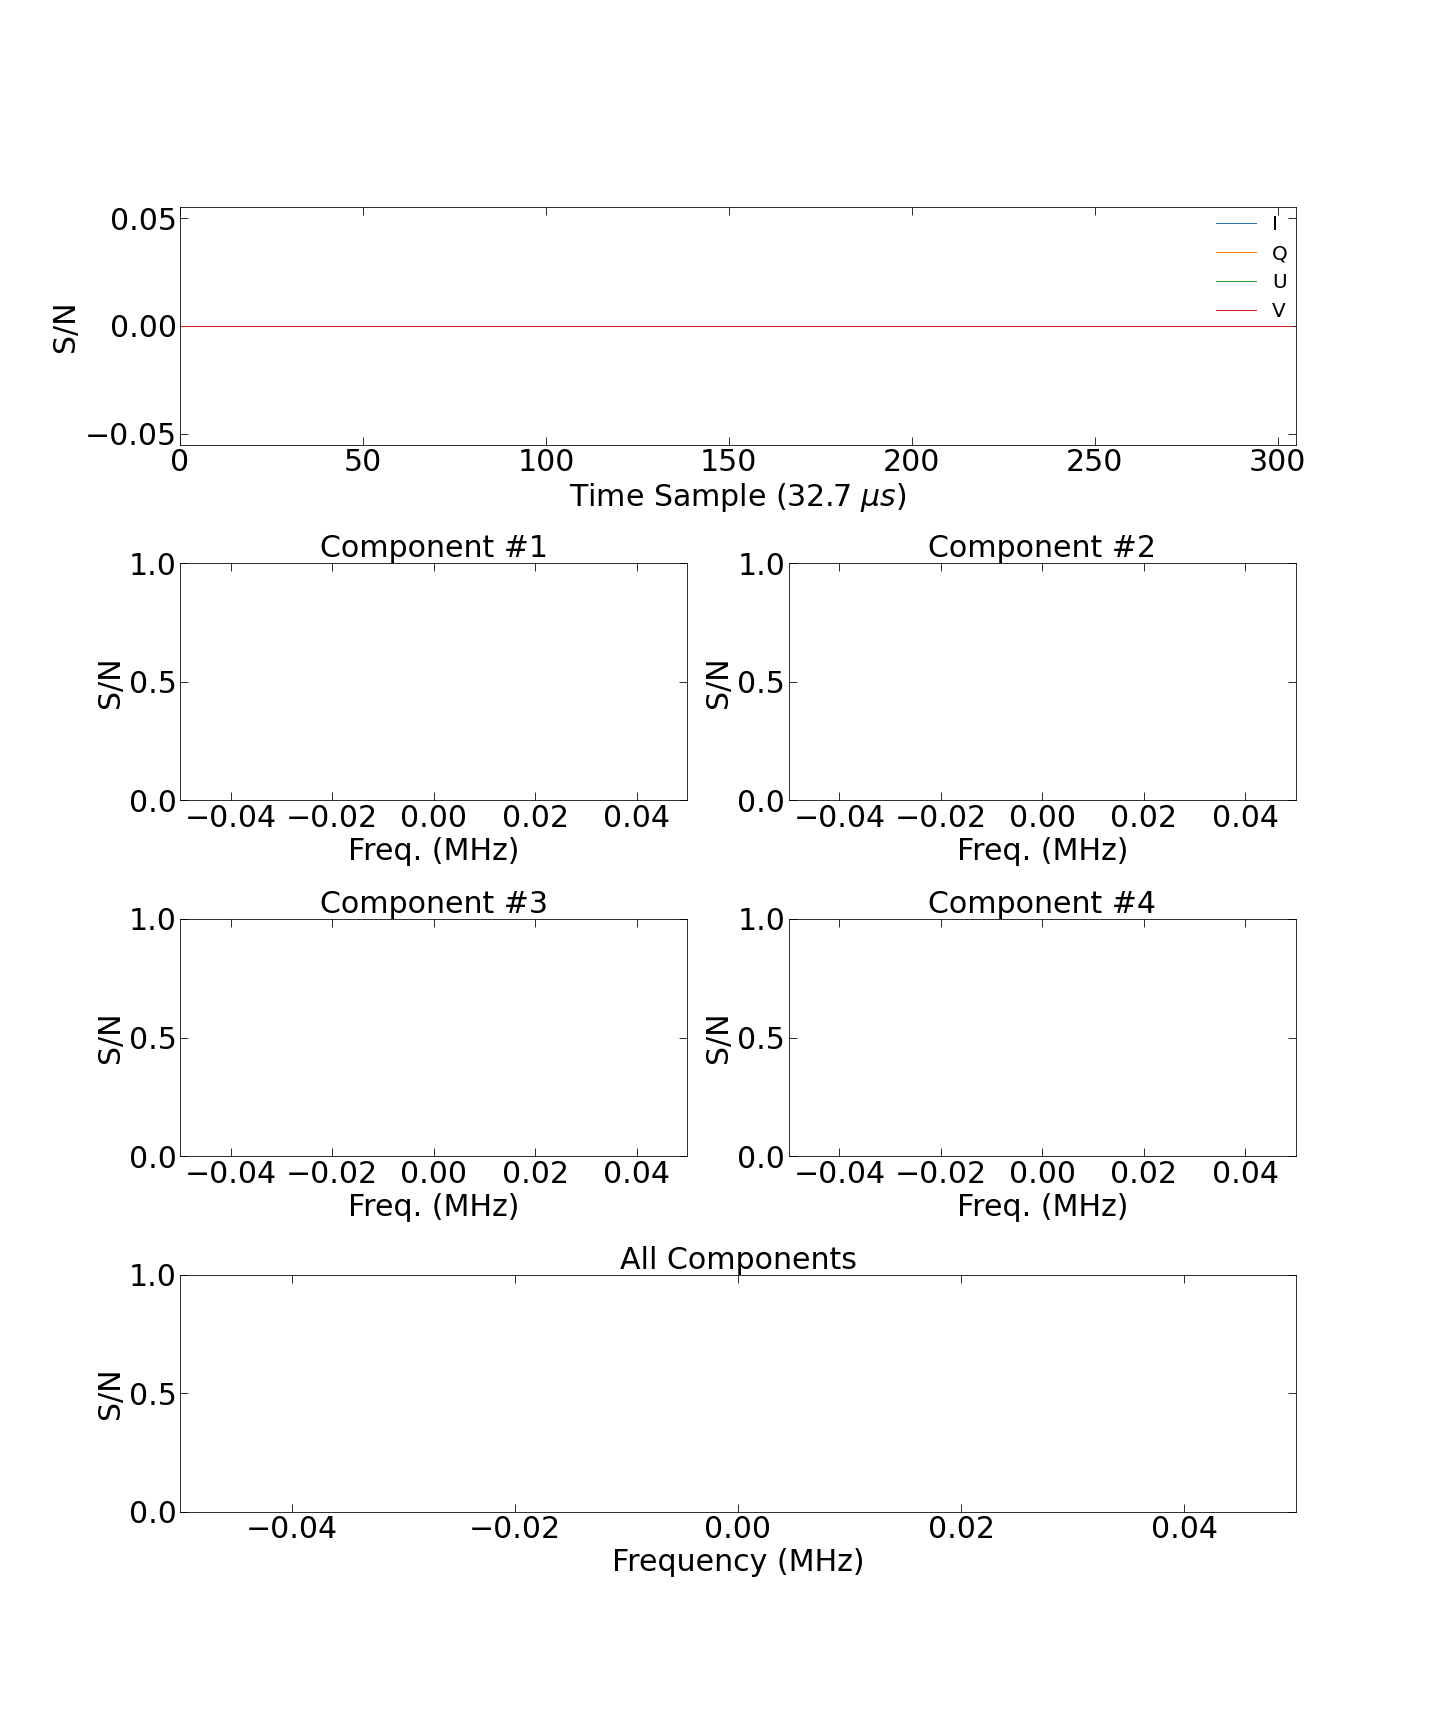

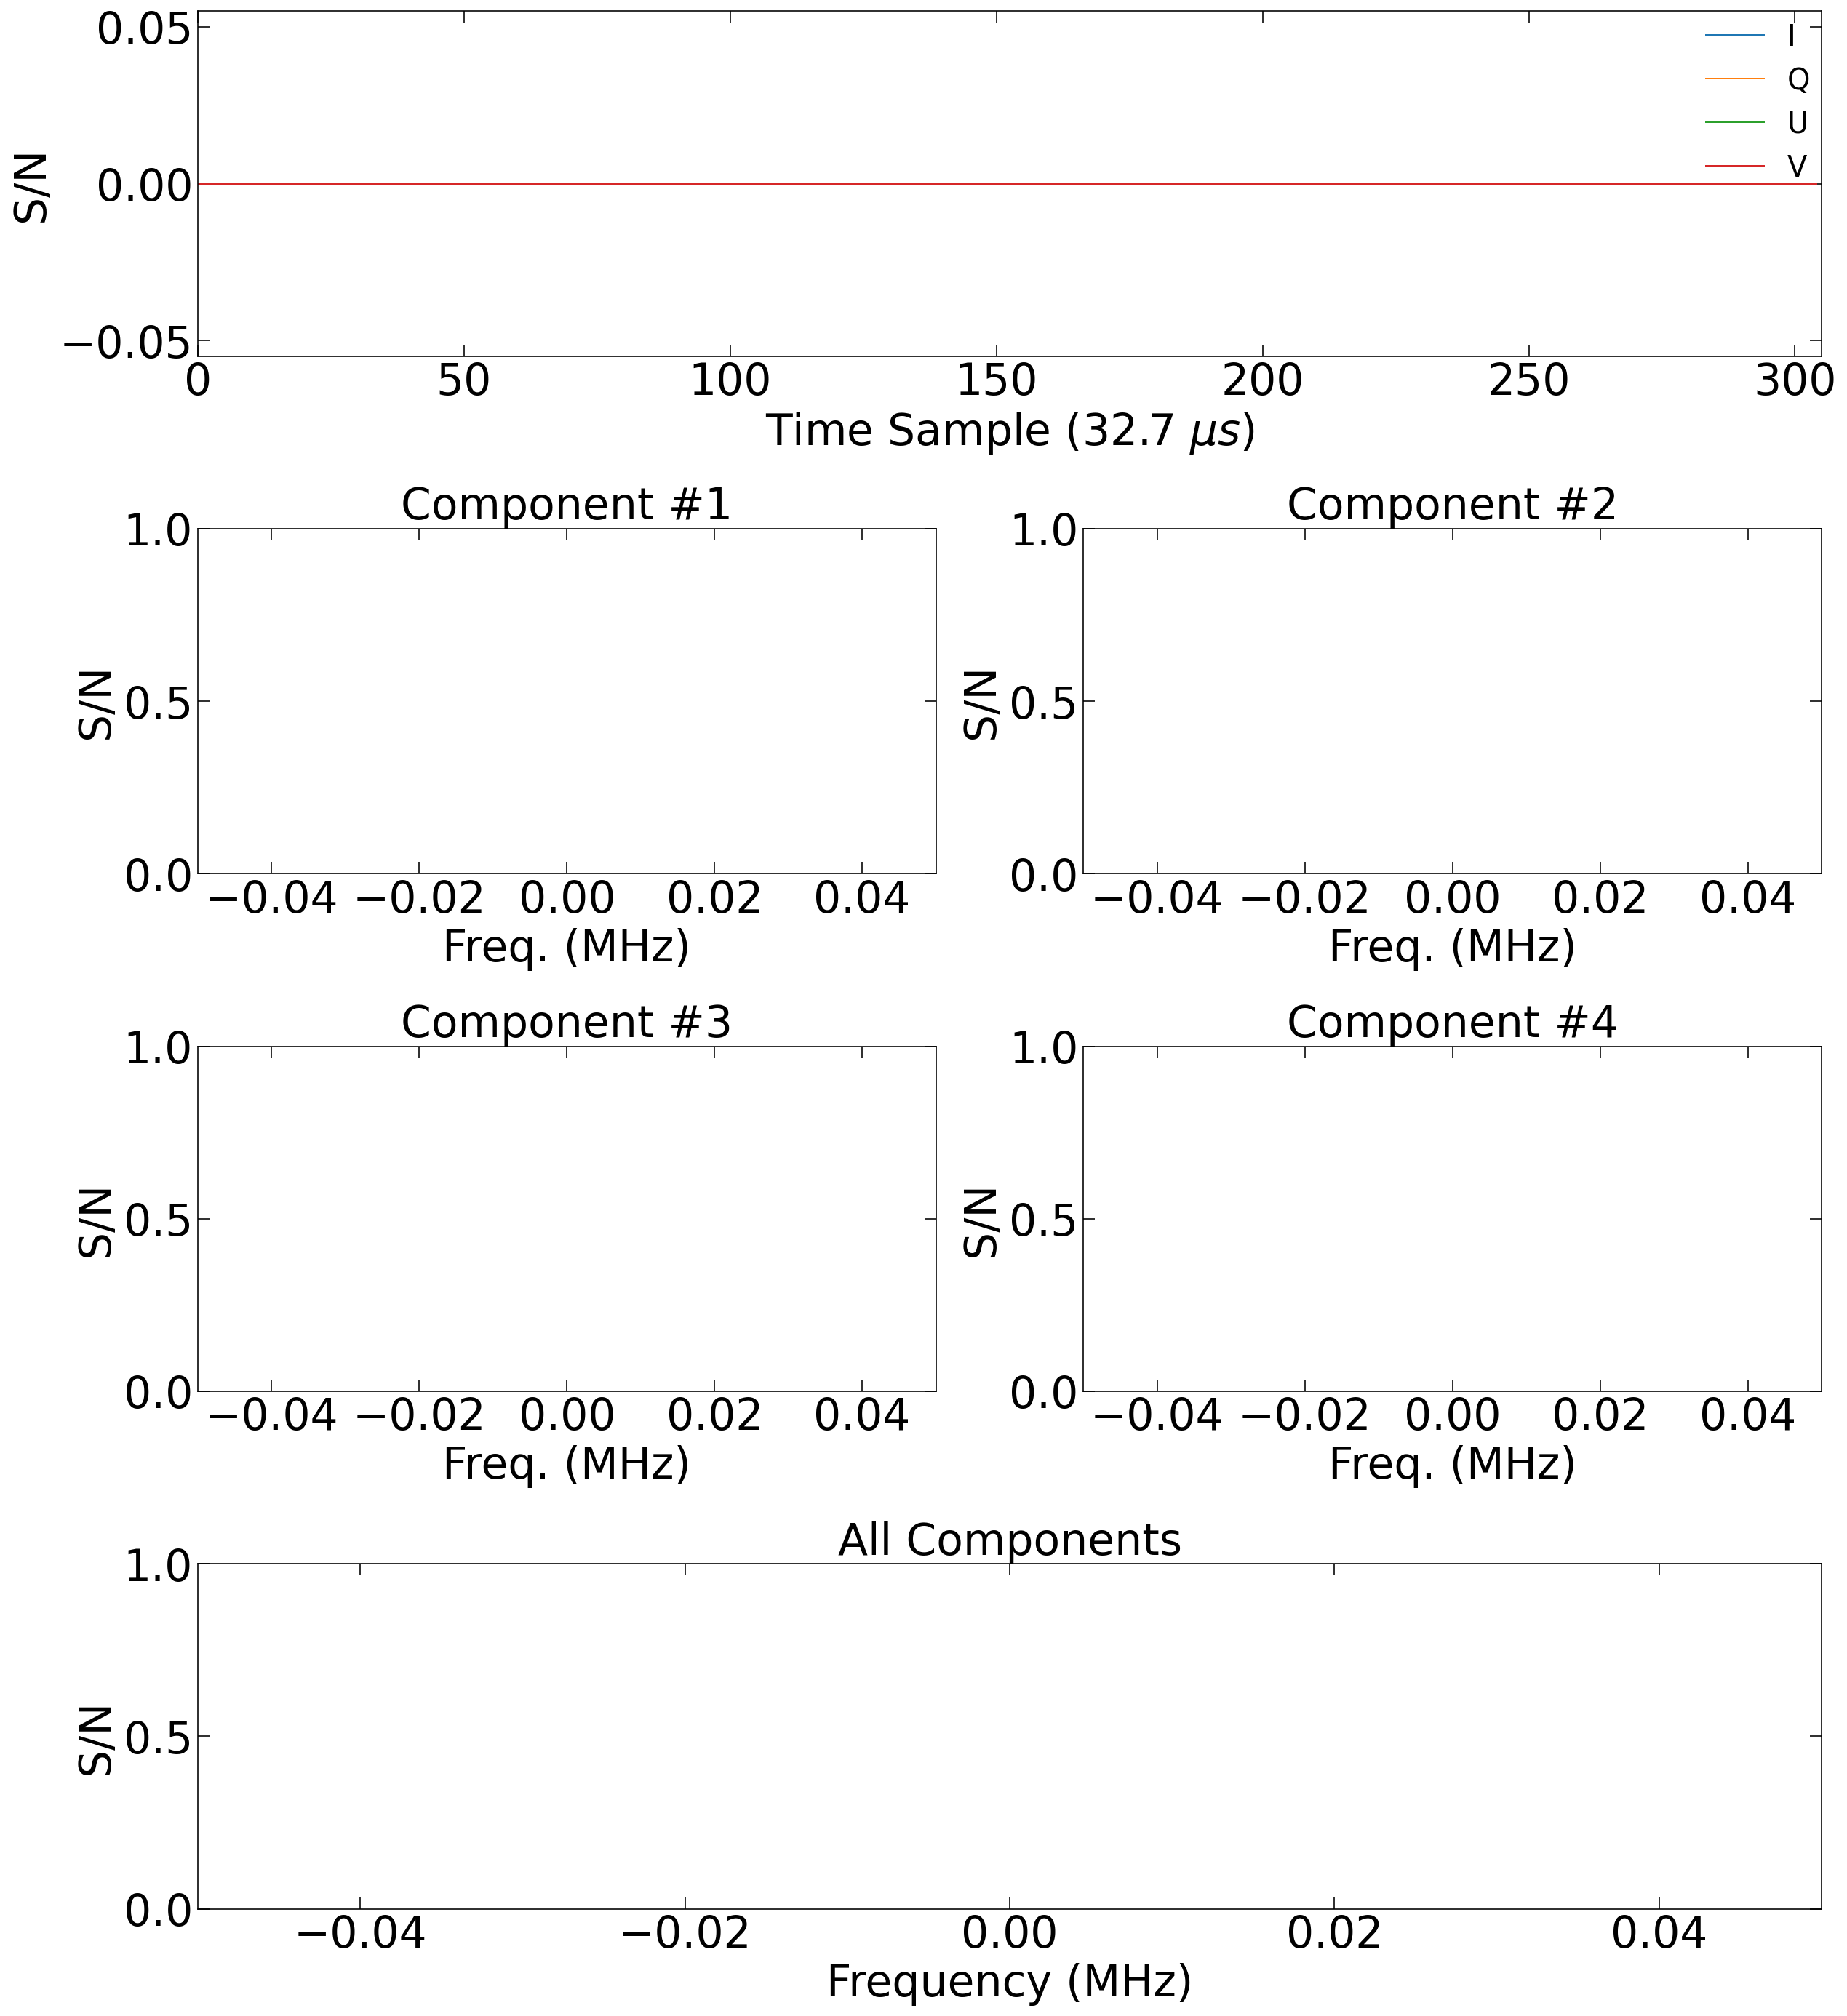

In [15]:
dashboard

Column
    [0] Row(background='#f0f0f0', margin=(10, 10, 10, 10))
        [0] Tabs(dynamic=True)
            [0] ParamFunction(function, lazy=True)
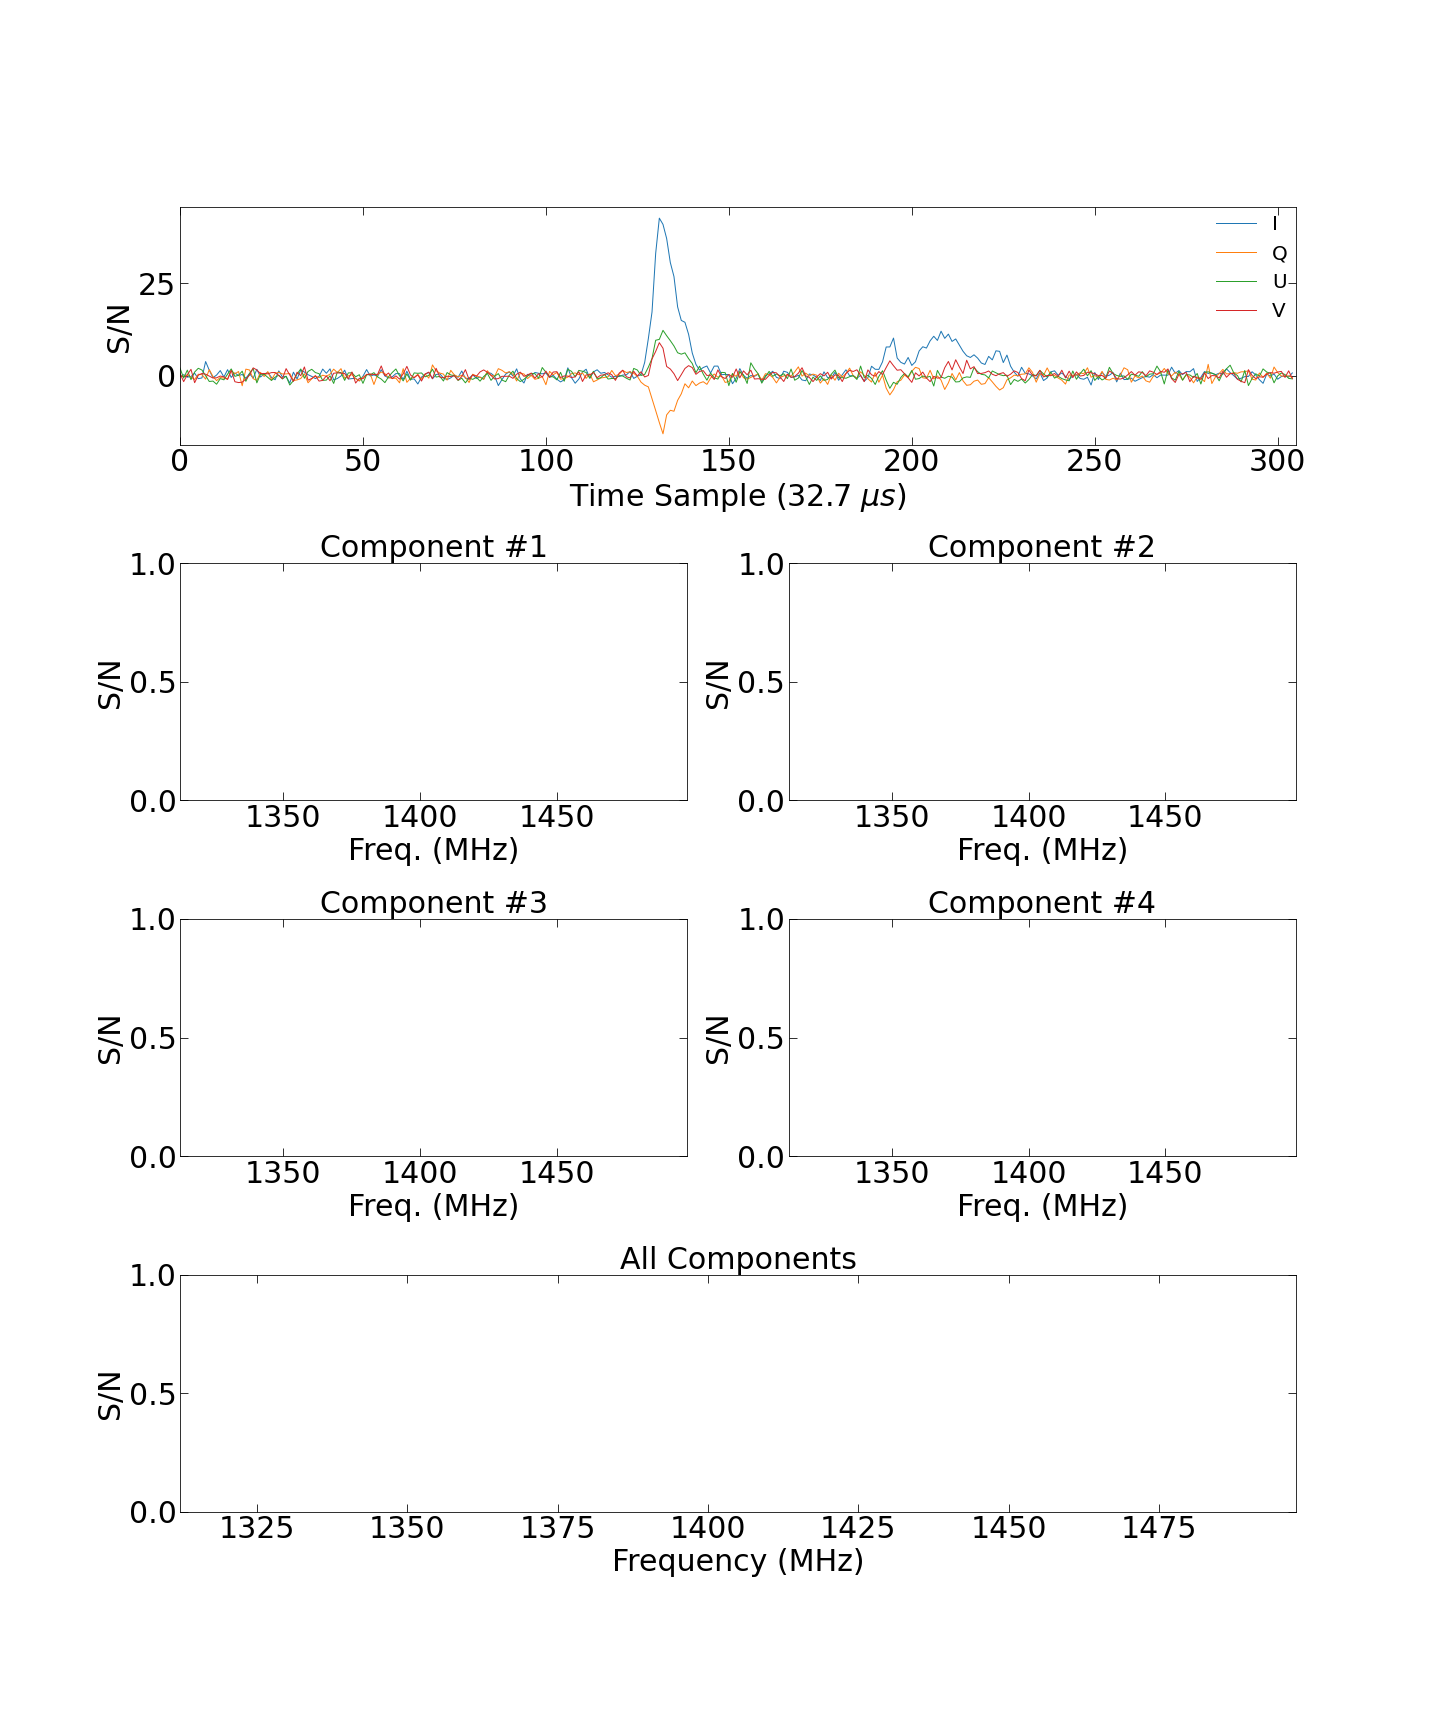

In [16]:
dashboard.servable(title="Burst Analysis Dashboard")